<a href="https://colab.research.google.com/github/chimaOkwuokei/ISEND-PAU/blob/main/faster_rcnn_implementation_of_punctual_defects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Preparation** **and** **Training**

In [1]:
!git clone https://github.com/sovit-123/fastercnn-pytorch-training-pipeline.git

fatal: destination path 'fastercnn-pytorch-training-pipeline' already exists and is not an empty directory.


In [2]:
# Enter the repo directory.
%cd fastercnn-pytorch-training-pipeline/

/content/fastercnn-pytorch-training-pipeline


In [3]:
# Install the Requirements
!pip install -r requirements.txt

In [4]:
!unzip -q ../train_data_defects.zip -d custom_data

replace custom_data/train_data_defects/images/train/0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [7]:

%%writefile data_configs/custom_data.yaml
# Images and labels direcotry should be relative to train.py
TRAIN_DIR_IMAGES: 'custom_data/train_data_defects/images/train'
TRAIN_DIR_LABELS: 'custom_data/train_data_defects/labels/train'
VALID_DIR_IMAGES: 'custom_data/train_data_defects/images/val'
VALID_DIR_LABELS: 'custom_data/train_data_defects/labels/val'

# Class names.
CLASSES: [
    '__background__',
    'cracks', 'incrust', 'dents' , 'stamps'
]

# Number of classes (object classes + 1 for background class in Faster RCNN).
NC: 5

# Whether to save the predictions of the validation set while training.
SAVE_VALID_PREDICTION_IMAGES: True

Overwriting data_configs/custom_data.yaml


In [12]:
!python train.py --data data_configs/custom_data.yaml --epochs 100 --model fasterrcnn_resnet50_fpn_v2 --name custom_training --batch 5
#0d7fc225d60e8c0f8ca2a8870971557bb2801693

2024-07-18 17:44:52.010326: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-18 17:44:52.010379: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-18 17:44:52.011666: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-18 17:44:52.019412: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-18 17:44:53.149648: W tensorflow/comp

## **Testing** **part**

In [21]:
!python inference.py --input /content/Dents5.jpg --weights outputs/training/custom_training/best_model.pth --table --th 0.5
#get count and area calculation
#outputs/training/custom_training/best_model.pth
#the file was corrupt, could have worked how i wanted it to


2024-07-18 18:08:02.634316: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-18 18:08:02.634367: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-18 18:08:02.635707: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-18 18:08:02.643020: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-18 18:08:03.859431: W tensorflow/comp

In [15]:
import matplotlib.pyplot as plt
import glob as glob

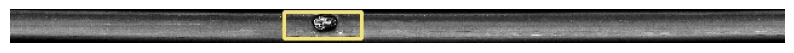

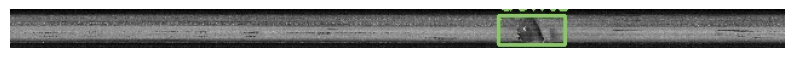

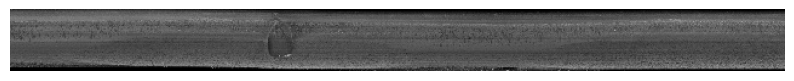

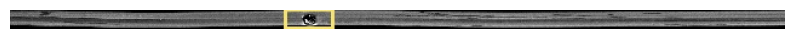

In [16]:
results_dir_path = '/content/fastercnn-pytorch-training-pipeline/outputs/training/custom_training'
valid_images = glob.glob(f"{results_dir_path}/*.jpg")

for i in range(4):
    plt.figure(figsize=(10, 7))
    image = plt.imread(valid_images[i])
    plt.imshow(image)
    plt.axis('off')
    plt.show()

In [ ]:
# No verbose mAP.
!python eval.py --weights outputs/training/custom_training/best_model.pth --data data_configs/custom_data.yaml --model fasterrcnn_resnet50_fpn_v2

In [13]:
# Verbose mAP.
!python eval.py --weights outputs/training/custom_training/best_model.pth --data data_configs/custom_data.yaml --model fasterrcnn_resnet50_fpn_v2 --verbose

2024-07-18 18:02:32.097924: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-18 18:02:32.097989: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-18 18:02:32.099453: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-18 18:02:32.107250: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-18 18:02:33.350197: W tensorflow/comp